# Import all required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [2]:
df = pd.read_csv('dataset.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
#customerId column is not important
df.drop('customerID', axis = 'columns', inplace = True)

In [8]:
#TotalCharges column should be numeric
df['TotalCharges'].dtype

dtype('O')

In [9]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [11]:
df[df['TotalCharges'].values == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.drop(df[df['TotalCharges'].isna()].index, inplace = True)
#we can use df.dropna also to drop null values

In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [15]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

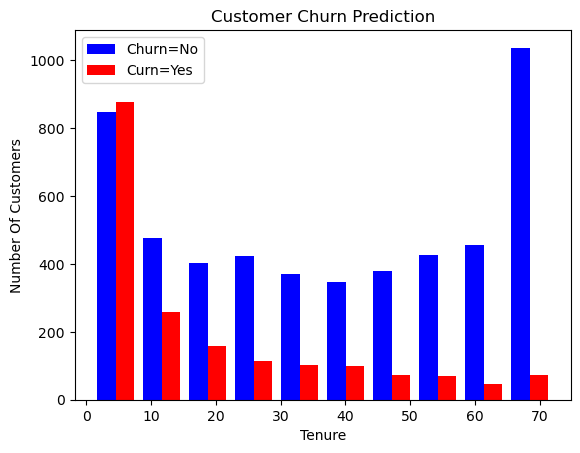

In [16]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure
plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction")
plt.hist([tenure_churn_no, tenure_churn_yes], color=['blue', 'red'], label=['Churn=No', 'Curn=Yes'])
plt.legend()

# Feature Engineering

In [17]:
def get_unique_values(df, onlyObject = False):
    for col in df.columns:
        if onlyObject:
            if df[col].dtype == 'object':
                print(f'{col} : {df[col].unique()}')
        else:
            print(f'{col} : {df[col].unique()}')

In [18]:
get_unique_values(df, True)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
df.replace(['No internet service', 'No phone service'], 'No', inplace = True)

In [20]:
get_unique_values(df, True)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1, 'No': 0}, inplace = True)

In [22]:
get_unique_values(df)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [23]:
df['gender'].replace({'Male': 1, 'Female': 0}, inplace = True)

In [24]:
df = pd.get_dummies(data = df, columns = ['InternetService', 'Contract', 'PaymentMethod'])
get_unique_values(df)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


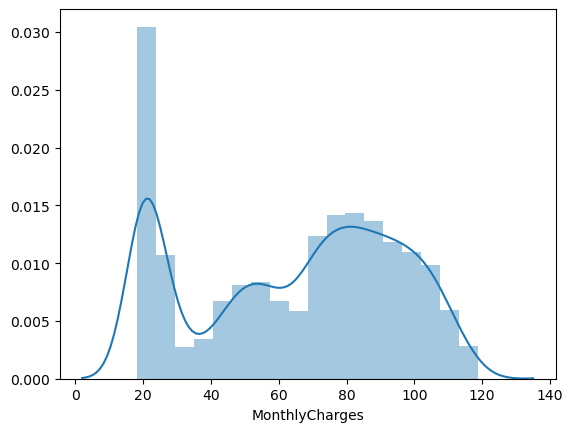

In [25]:
sns.distplot(df['MonthlyCharges'])

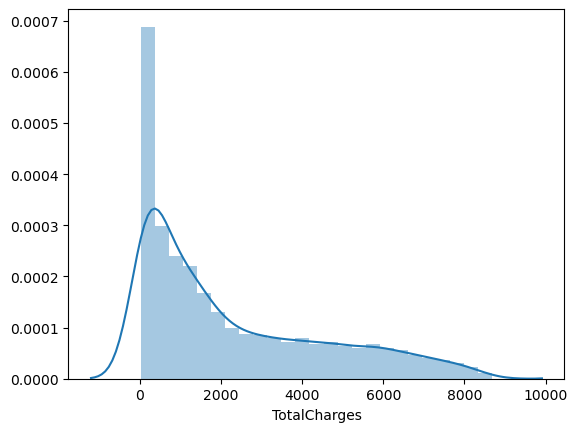

In [26]:
sns.distplot(df['TotalCharges'])

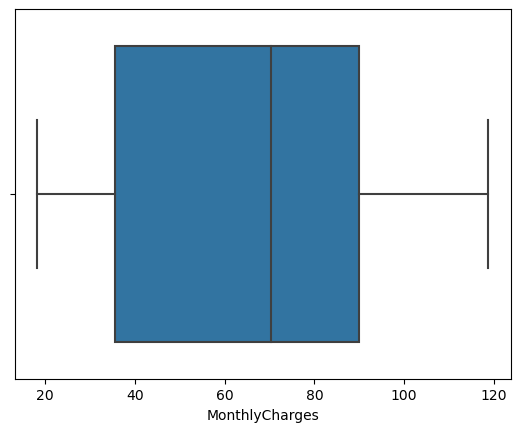

In [27]:
sns.boxplot(df['MonthlyCharges'])

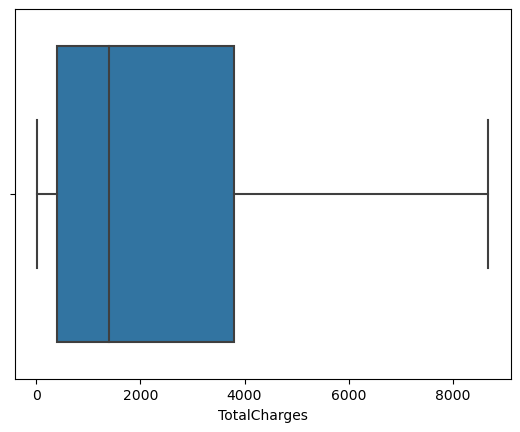

In [28]:
sns.boxplot(df['TotalCharges'])

In [29]:
X = df.drop('Churn', axis = 1)
y = df[['Churn']]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)

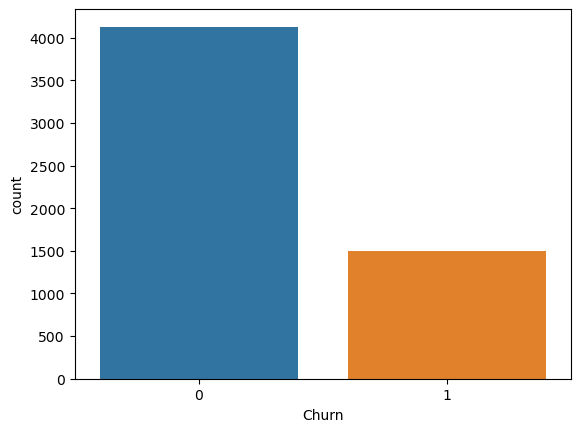

In [31]:
# We can see here data are not formally distributed 
# For better results needs to distribute data formally
# SMOTE will be good solution for this
sns.countplot(y_train['Churn'])

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

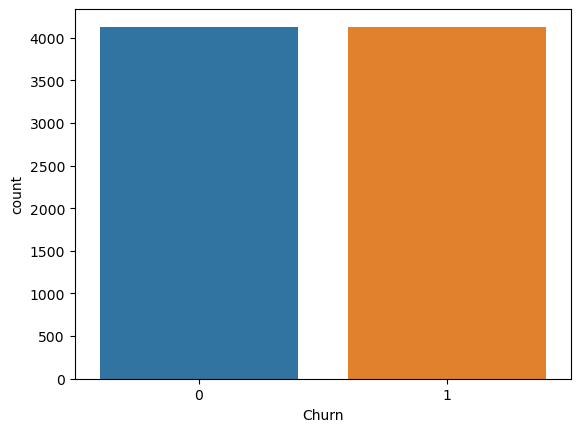

In [33]:
sns.countplot(y_train['Churn'])

In [34]:
X_train.shape, y_train.shape

((8260, 26), (8260, 1))

In [35]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [36]:
get_unique_values(X_train)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [1 0]
tenure : [0.90140845 0.35211268 0.94366197 0.02816901 0.67605634 0.88732394
 0.08450704 0.29577465 0.42253521 0.07042254 0.         0.15492958
 0.84507042 0.5915493  0.4084507  0.71830986 0.78873239 1.
 0.57746479 0.1971831  0.64788732 0.01408451 0.43661972 0.98591549
 0.46478873 0.69014085 0.12676056 0.09859155 0.30985915 0.32394366
 0.85915493 0.50704225 0.14084507 0.25352113 0.63380282 0.11267606
 0.05633803 0.56338028 0.8028169  0.92957746 0.16901408 0.38028169
 0.87323944 0.73239437 0.97183099 0.18309859 0.04225352 0.36619718
 0.91549296 0.47887324 0.23943662 0.22535211 0.52112676 0.6056338
 0.95774648 0.70422535 0.33802817 0.26760563 0.54929577 0.21126761
 0.61971831 0.81690141 0.45070423 0.76056338 0.77464789 0.83098592
 0.28169014 0.3943662  0.74647887 0.49295775 0.66197183 0.53521127]
PhoneService : [1 0]
MultipleLines : [1 0]
OnlineSecurity : [1 0]
OnlineBackup : [1 0]
DeviceProtection : [1 0]
TechSupport

In [37]:
get_unique_values(X_test)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [1 0]
tenure : [0.81690141 0.08450704 0.74647887 0.01408451 0.98591549 0.83098592
 0.45070423 0.18309859 1.         0.04225352 0.11267606 0.50704225
 0.4084507  0.02816901 0.29577465 0.97183099 0.         0.66197183
 0.52112676 0.76056338 0.67605634 0.85915493 0.91549296 0.3943662
 0.84507042 0.14084507 0.6056338  0.92957746 0.73239437 0.88732394
 0.46478873 0.71830986 0.09859155 0.30985915 0.77464789 0.07042254
 0.33802817 0.28169014 0.5915493  0.78873239 0.95774648 0.36619718
 0.12676056 0.53521127 0.32394366 0.35211268 0.63380282 0.38028169
 0.26760563 0.8028169  0.64788732 0.43661972 0.47887324 0.94366197
 0.57746479 0.21126761 0.23943662 0.22535211 0.16901408 0.1971831
 0.69014085 0.87323944 0.05633803 0.61971831 0.56338028 0.25352113
 0.42253521 0.90140845 0.15492958 0.54929577 0.49295775 0.70422535]
PhoneService : [1 0]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

# Model building & Prediction

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
259/259 [==============================] - 1s 2ms/step - loss: 0.5026 - accuracy: 0.7598
Epoch 2/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8236
Epoch 3/50
259/259 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8333
Epoch 4/50
259/259 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8363
Epoch 5/50
259/259 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8430
Epoch 6/50
259/259 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8437
Epoch 7/50
259/259 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8465
Epoch 8/50
259/259 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8455
Epoch 9/50
259/259 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8479
Epoch 10/50
259/259 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8479

In [40]:
churn_pred = model.predict(X_test)
churn_pred

array([[0.00925088],
       [0.8357943 ],
       [0.00797707],
       ...,
       [0.00385013],
       [0.01703602],
       [0.00383252]], dtype=float32)

In [41]:
pred_values = []
for pred_value in churn_pred:
    if pred_value > 0.5:
        pred_values.append(1)
    else:
        pred_values.append(0)

In [42]:
y_test[:10]

,Churn
974,0
619,0
4289,0
3721,1
4533,0
445,1
5898,0
3387,0
1346,1
5690,0


In [43]:
pred_values[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 1, 0]

In [44]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7733


[0.47753316164016724, 0.7732764482498169]

In [45]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.57      0.64      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.78      1407



Text(70.72222222222221, 0.5, 'Actual')

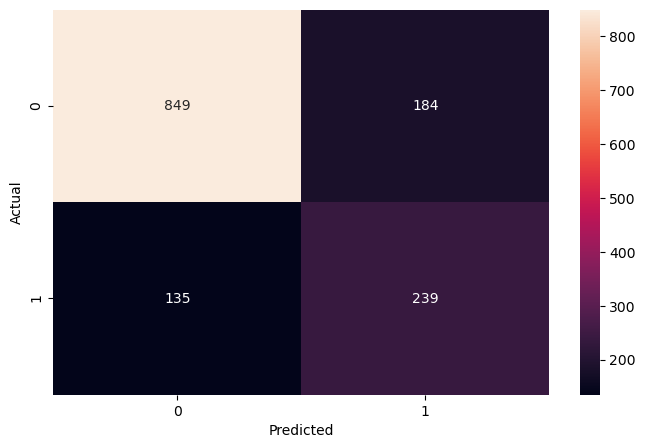

In [46]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=pred_values)
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [47]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(14, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=50)
    else:
        model.fit(X_train, y_train, epochs=50, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print(f"Classification Report: \n {classification_report(y_test, y_preds)}")
    
    return y_preds

In [48]:
df_churn_no = df[df.Churn==0]
df_churn_yes = df[df.Churn==1]
df_churn_no.shape, df_churn_yes.shape

((5163, 27), (1869, 27))

In [49]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train  

In [50]:
X_train, y_train = get_train_batch(df_churn_no, df_churn_yes, 0, 1869)
pred_values1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50
117/117 [==============================] - 1s 2ms/step - loss: 6.4919 - accuracy: 0.5484
Epoch 2/50
117/117 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6367
Epoch 3/50
117/117 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.7052
Epoch 4/50
117/117 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7103
Epoch 5/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7212
Epoch 6/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7301
Epoch 7/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7386
Epoch 8/50
117/117 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.7124
Epoch 9/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.7255
Epoch 10/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7429

In [51]:
X_train, y_train = get_train_batch(df_churn_no, df_churn_yes, 1869, 3738)
pred_values2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50
117/117 [==============================] - 1s 2ms/step - loss: 9.6031 - accuracy: 0.6332
Epoch 2/50
117/117 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.7186
Epoch 3/50
117/117 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.7111
Epoch 4/50
117/117 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.7172
Epoch 5/50
117/117 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7180
Epoch 6/50
117/117 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.7108
Epoch 7/50
117/117 [==============================] - 0s 2ms/step - loss: 0.7717 - accuracy: 0.6937
Epoch 8/50
117/117 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.7210
Epoch 9/50
117/117 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.7266
Epoch 10/50
117/117 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7183

In [52]:
X_train, y_train = get_train_batch(df_churn_no, df_churn_yes, 3738, 5163)
pred_values3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50
103/103 [==============================] - 1s 2ms/step - loss: 0.9629 - accuracy: 0.7119
Epoch 2/50
103/103 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.7262
Epoch 3/50
103/103 [==============================] - 0s 2ms/step - loss: 0.7220 - accuracy: 0.7180
Epoch 4/50
103/103 [==============================] - 0s 2ms/step - loss: 1.0433 - accuracy: 0.7034
Epoch 5/50
103/103 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.7332
Epoch 6/50
103/103 [==============================] - 0s 2ms/step - loss: 0.7990 - accuracy: 0.7240
Epoch 7/50
103/103 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.7577
Epoch 8/50
103/103 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.7335
Epoch 9/50
103/103 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.7341
Epoch 10/50
103/103 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.7523

In [53]:
preds_final = []
for index in range(len(pred_values1)):
    churn_yes = pred_values1[index] + pred_values2[index] + pred_values3[index]
    if churn_yes > 1:
        preds_final.append(1)
    else:
        preds_final.append(0)

In [54]:
from sklearn.metrics import confusion_matrix , classification_report
print(f"Classification Report: \n {classification_report(y_test,preds_final)}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.32      0.47      1033
           1       0.33      0.91      0.48       374

    accuracy                           0.47      1407
   macro avg       0.62      0.61      0.47      1407
weighted avg       0.75      0.47      0.47      1407



Text(70.72222222222221, 0.5, 'Actual')

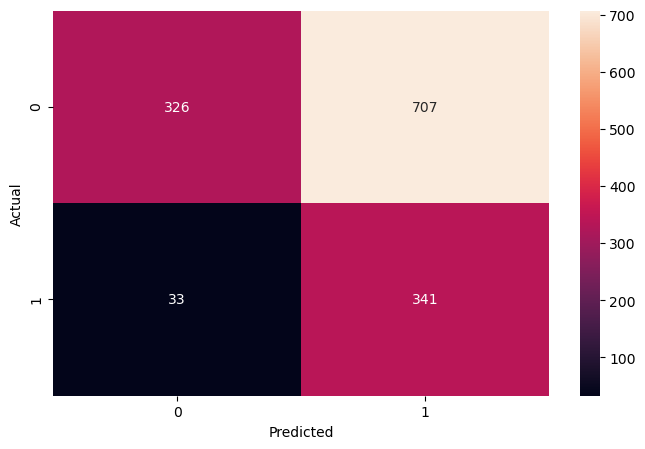

In [55]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=preds_final)
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')